In [2]:
# my notes https://docs.google.com/document/d/1YwC5URk4_qqMq1PMHV12hBXpbnKMR5h48wzmpHIZgss/edit

# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
%matplotlib inline

In [5]:
dataset_test = pd.read_csv('./aug_test.csv', encoding='utf-8')

In [6]:
print(dataset_test.shape)

(2129, 13)


In [7]:
dataset_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [8]:
dataset_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [9]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [10]:
dataset_test.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [11]:
dataset_test.dtypes == object

enrollee_id               False
city                       True
city_development_index    False
gender                     True
relevent_experience        True
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [12]:
filter_cols_text = dataset_test.dtypes == object
filter_cols_number = (dataset_test.dtypes == float) | (dataset_test.dtypes == int)

In [13]:
text_columns = [c for c in filter_cols_text.index if filter_cols_text[c]]
num_columns = [c for c in filter_cols_number.index if filter_cols_number[c]]

In [23]:
dataset_num = dataset_test[num_columns]
dataset_tex = dataset_test[text_columns]
dataset_num

,enrollee_id,city_development_index,training_hours
0,32403,0.827,21
1,9858,0.920,98
2,31806,0.624,15
3,27385,0.827,39
4,27724,0.920,72
...,...,...,...
2124,1289,0.920,15
2125,195,0.897,30
2126,31762,0.887,18
2127,7873,0.804,84


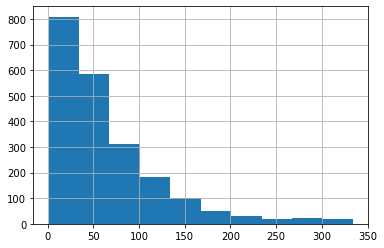

In [25]:
dataset_num['training_hours'].hist()

In [30]:
dataset_num.head(25)

,enrollee_id,city_development_index,training_hours
0,32403,0.827,21
1,9858,0.920,98
2,31806,0.624,15
3,27385,0.827,39
4,27724,0.920,72
5,217,0.899,12
6,21465,0.624,11
7,27302,0.920,81
8,12994,0.878,2
9,16287,0.624,4


In [31]:
dataset_tex.head(20)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_41,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1
1,city_103,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1
2,city_21,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never
3,city_13,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1
4,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4
5,city_23,Male,No relevent experience,Part time course,Masters,STEM,10,NaN,NaN,2
6,city_21,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1
7,city_160,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4
8,city_173,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
9,city_21,Male,Has relevent experience,Full time course,Graduate,NaN,3,50-99,Funded Startup,1
